In [1]:
import re
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = 'https://en.wikipedia.org/wiki/United_States_midterm_election'
df = pd.read_html(url)[1]
df.columns = df.columns.droplevel(0)  # Remove multiple header.
df.tail()

,Year,Sitting president,President's party,House seats,Senate seats,Unnamed: 5_level_1
55,2010,Barack Obama,Democratic,-63: (256 ► 193),-6: (59 ► 53),NaN
56,2014,Barack Obama,Democratic,-13: (201 ► 188),-9: (55 ► 46),NaN
57,2018,Donald Trump,Republican,-41: (241 ► 200),+2: (51 ► 53),NaN
58,2022,Joe Biden,Democratic,-9: (222 ► 213),+1: (50 ► 51),NaN
59,2026,TBD,TBD,TBD,TBD,NaN


In [3]:
df = df.iloc[:-1, : -1]  # Remove last row & last column.
df = df.set_index('Year')
df = df.rename(columns = {'House seats':'House results', 'Senate seats':'Senate results'})
df = df.drop(["Sitting president", "President's party"], axis=1)
df.tail()

,House results,Senate results
Year,,
2006,-32: (231 ► 199),-6: (55 ► 49)
2010,-63: (256 ► 193),-6: (59 ► 53)
2014,-13: (201 ► 188),-9: (55 ► 46)
2018,-41: (241 ► 200),+2: (51 ► 53)
2022,-9: (222 ► 213),+1: (50 ► 51)


In [4]:
# Remove the colon and characters after the colon:
df['House results'] = ([re.sub(r':.*', '', str(x)) 
                        for x in df['House results']])
df['Senate results'] = ([re.sub(r':.*', '', str(x)) 
                         for x in df['Senate results']])
df.tail()

,House results,Senate results
Year,,
2006,-32,-6
2010,-63,-6
2014,-13,-9
2018,-41,+2
2022,-9,+1


In [5]:
# Remove the plus character:
df['House results'] = ([re.sub(r'[+]', '', str(x)) 
                        for x in df['House results']])
df['Senate results'] = ([re.sub(r'[+]', '', str(x)) 
                         for x in df['Senate results']])
df.tail()

,House results,Senate results
Year,,
2006,-32,-6
2010,-63,-6
2014,-13,-9
2018,-41,2
2022,-9,1


In [6]:
# Convert column values to integers:
df['House results'] = df['House results'].astype(int)
df['Senate results'] = df['Senate results'].astype(int)
df.tail()

,House results,Senate results
Year,,
2006,-32,-6
2010,-63,-6
2014,-13,-9
2018,-41,2
2022,-9,1


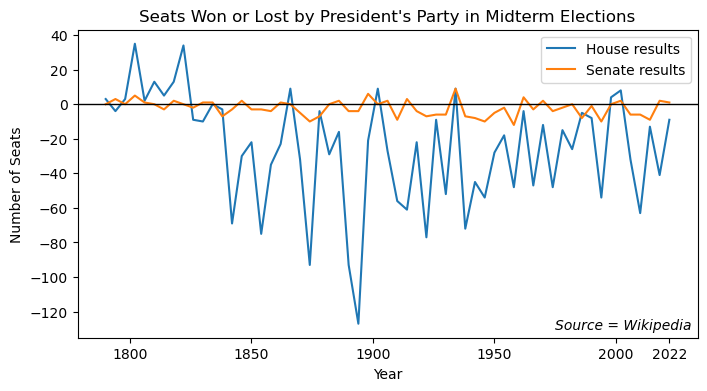

In [7]:
df.plot(figsize=(8, 4),
        title="Seats Won or Lost by President's Party in Midterm Elections")
plt.axhline(y=0, color='k', lw=1)
plt.xticks([1800, 1850, 1900, 1950, 2000, 2022])
plt.text(x=1975, y=-130, 
         s='Source = Wikipedia', 
         fontsize=10, 
         fontstyle='italic')
plt.ylabel('Number of Seats');

In [8]:
url='http://bit.ly/4192VtR'
df_seats = pd.read_csv(url)
df_seats = df_seats.set_index('Year')
df_seats.head(3)

,Senate,House
Year,,
1790,26,65
1794,30,105
1798,32,106


In [9]:
df_pct = pd.merge(df, df_seats, left_index=True, right_index=True) 
df_pct['House Pct'] = (round((df_pct['House results'] / 
                              df_pct['House']) * 100, 1))
df_pct['Senate Pct'] = (df_pct['Senate results'] / df_pct['Senate']) * 100
df_pct.tail(3)

,House results,Senate results,Senate,House,House Pct,Senate Pct
Year,,,,,,
2014,-13,-9,100,435,-3.0,-9.0
2018,-41,2,100,435,-9.4,2.0
2022,-9,1,100,435,-2.1,1.0


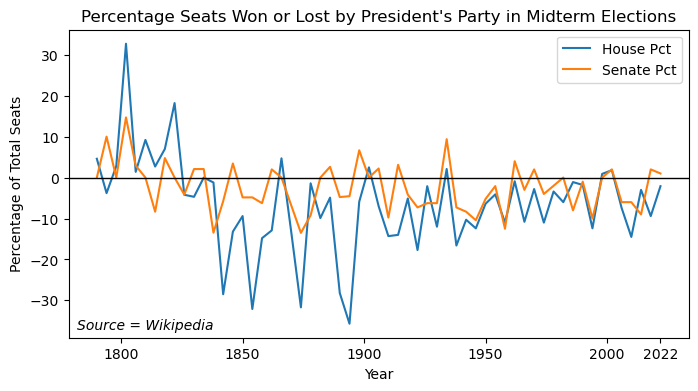

In [10]:
df_pct.plot(y=['House Pct','Senate Pct'], figsize=(8, 4))
plt.title("Percentage Seats Won or Lost by President's Party in Midterm Elections")
plt.axhline(y = 0, color = 'k', lw=1)
plt.xticks([1800, 1850, 1900, 1950, 2000, 2022])
plt.text(x=1782, y=-37, s='Source = Wikipedia', fontsize=10, fontstyle='italic')
plt.ylabel('Percentage of Total Seats');

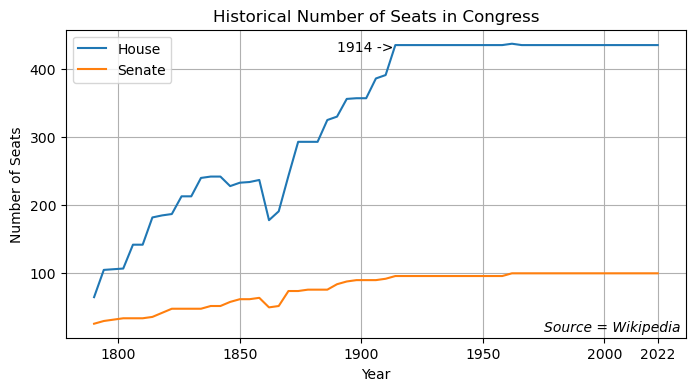

In [11]:
df_pct.plot(y=['House','Senate'], 
            title="Historical Number of Seats in Congress",
            figsize=(8, 4), 
            grid=True)
plt.xticks([1800, 1850, 1900, 1950, 2000, 2022])
plt.text(x=1975, y=15, 
         s='Source = Wikipedia', 
         fontsize=10, 
         fontstyle='italic')
plt.text(x=1890, y=426,
         s='1914 ->')
plt.ylabel('Number of Seats');